In [23]:
import numpy as np
import scipy 
import random
from scipy.interpolate import interp1d
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Bias-variance tradeoff
Week 3 | Day 2



### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Define bias and variance at an intuitive level
- Explain a model's error in terms of bias and variance


## Quantifying error

We want to minimize the predictive error of our models. (I.e. we need an objective function.) How do we quantify the error in our model?

One metric: Sum of Squared Errors (SSE)

$$ SSE = \sum_{i=1}^{n}(y_i - f(x_i))^2 = \sum_{i=1}^{n}(y_i - \hat y)^2 $$

$x_i$ -- a given x value

$y_i$ -- actual y value

$f(x_i)$-- the model's predicted y value

$\hat y $ -- predicted y value

### SSE can be decomposed<sup>1</sup> into error due to Bias and Variance


$$SSE \sim E(y_i - \hat{f}(x_i))^2 = Var(\hat{f}(x_i))\ + [Bias(\hat{f}(x_i))]^2 + Var(\epsilon)$$

Bias?
*Your model makes assumptions about the shape of the data and consistently gets it wrong as it is run on new sample data.*

Variance?
*Imagine building your model many times, on different slices of data. Variance is related to how much your predictions for a given $x_i$ differ each time you make a prediction*

<sup>1</sup>See the derivation of this result [here](https://theclevermachine.wordpress.com/tag/bias-variance-decomposition/)

### Graphical Representation
Imagine each dart throw is a new prediction *for a single data point $x_i$*.
<img src="http://i.imgur.com/a5xdMcD.png" width=500>

*Image from http://scott.fortmann-roe.com/docs/BiasVariance.html

**A high-bias model**
<img src="http://i.imgur.com/gYKTmc3.png">

**If we increase the complexity, the bias decreases**
<img src="http://i.imgur.com/6pWmArq.png">

All datasets contain error. Here's a subset of that same data with one error point as an outlier

We can fit a high-degree polynomial to these points to fit the training set perfectly.
<img src="http://i.imgur.com/0MHE87C.png">

However, when we repeat that model fit on new data, our prediction makes errors. This is error due to variance. 
<img src="http://i.imgur.com/pqqkyCK.png">

## The tradeoff:

<img src="https://camo.githubusercontent.com/be96d619bff8883343cf541ed1405a8f7f5991cc/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f6d6174682f632f622f632f63626336353331306430396136656661363330643863316633336364666138382e706e67">
<img src="https://camo.githubusercontent.com/34d8f46b4220c71b359f55db15ed9124474b397d/687474703a2f2f73636f74742e666f72746d616e6e2d726f652e636f6d2f646f63732f646f63732f4269617356617269616e63652f6269617376617269616e63652e706e67">

## Exercise:

Take 10 minutes to read the definition of error from "bias" and from "variance" at this link:<br>
https://jvns.ca/blog/2016/01/02/winning-the-bias-variance-tradeoff/

Jot down a definition for each in your own words, and draw at least two illustrative models: a high-variance model, and a high-bias model.

## Guided Demo

Below we will be fitting models predicting student morale by day number in the course. We have the "true function" representing the function from which any student in the population of all students measurements are generated (plus noise). 

The overall goal when building a model is to minimize the bias _and_ the variance. The perfect model would have zero bias and zero variance. In reality, the bias or the variance typically increase while the other decreases.


### Set up the days and morale variables

Below are the day numbers in the course and the morale function, which takes a day as an argument and returns a morale number.

In [2]:
days = np.arange(1,85,1)
weekpoints = [1, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84]
moralepoints = [20, 30, 35, 18, 6, 3, 12, 35, 44, 53, 62, 73, 80]

# The interp1d function creates an interpolation function for us between the week numbers and morale points. 
# The kind='cubic' parameter indicates the smoothing of the interpolation.
morale_func = interp1d(weekpoints, moralepoints, kind='cubic')
morale_true = morale_func(days)

### Plot the true morale function

We can then plot out the true function of days vs. morale. 

The true function represents:

1. What all morale measurements would be at each day if you had no noise in your measurements. 
2. The measurement of morale for any student prior to adding noise. In this way **students are generated from the true function**.
3. The average morale across an infinite number of students.

You will always have noise in measurements, it just depends how much. In the context of bias-variance tradeoff, this is referred to as "irreducible error", which are the deviations from the true function in your observations that cannot be accounted for by a model.

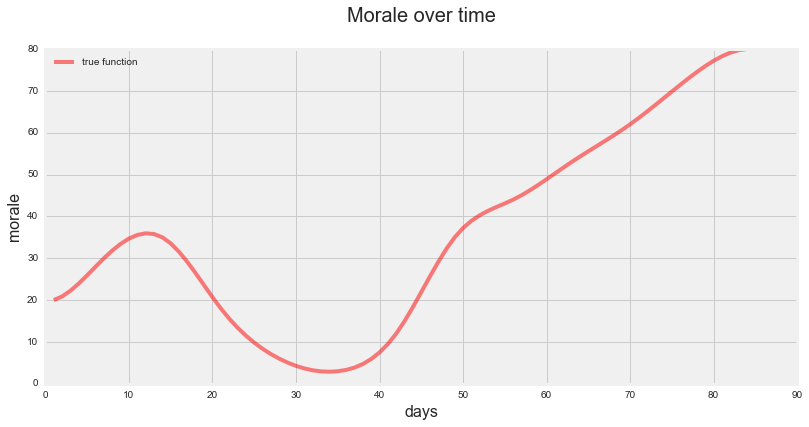

In [3]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax.plot(days, morale_true, lw=4., c='r', alpha=0.5, label='true function')

ax.set_xlabel('days', fontsize=16)
ax.set_ylabel('morale', fontsize=16)
ax.set_title('Morale over time\n', fontsize=20)

plt.legend(loc='upper left')

## Let's create some students

In [4]:
def make_students(f, days, size=12):
    students = {}
    for student in ['A','B','C','D']:
        daysamp = np.random.choice(days, replace=False, size=size)
        morales = f(daysamp) + np.random.normal(0, 13, size=size)
        students[student] = {'days': daysamp, 'morale': morales}
    return students

students = make_students(morale_func, days, size=12)

## Student A's journey

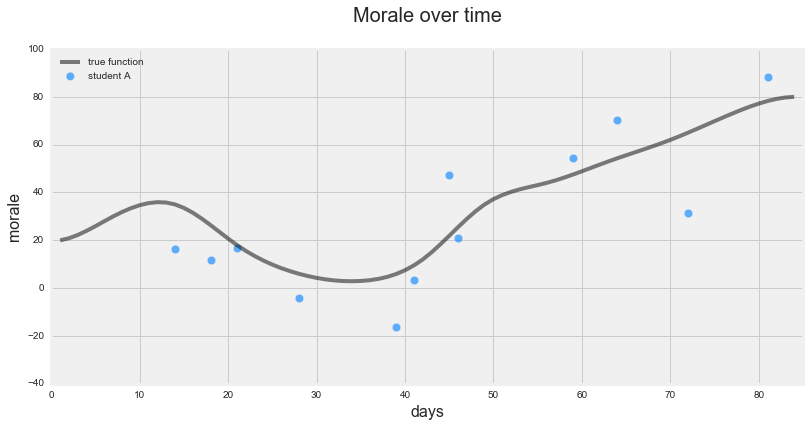

In [5]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax.plot(days, morale_true, lw=4., c='k', alpha=0.5, label='true function')
ax.scatter(students['A']['days'], students['A']['morale'],
           s=70, c='dodgerblue', label='student A', alpha=0.7)

ax.set_xlabel('days', fontsize=16)
ax.set_ylabel('morale', fontsize=16)
ax.set_title('Morale over time\n', fontsize=20)
ax.set_xlim([0, 85])

plt.legend(loc='upper left')

### Construct a model for student A

I decide to measure the morale with a linear regression, predicting it from the number of days. 

My model is:

### $$\hat{morale} = \beta_0 + \beta_1days$$

In [6]:
studA_days = students['A']['days']
studA_mor = students['A']['morale']

Amod = LinearRegression()
Amod.fit(studA_days[:, np.newaxis], studA_mor)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Plot the fitted model

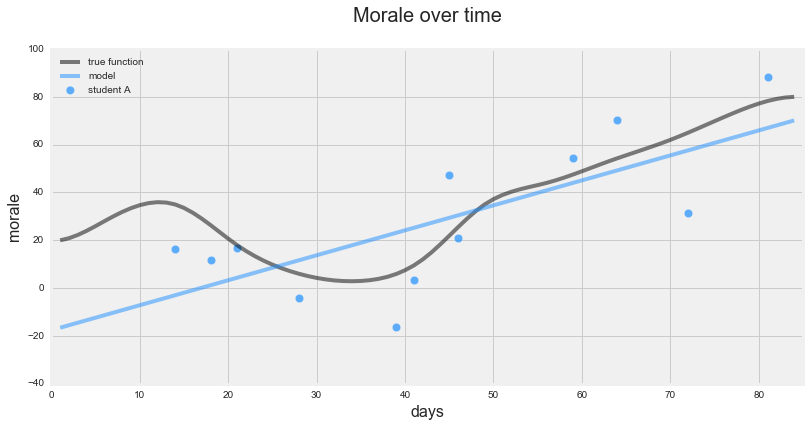

In [7]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax.plot(days, morale_true, lw=4, c='k', alpha=0.5, label='true function')

ax.plot(days, Amod.predict(days[:, np.newaxis]), lw=4, c='dodgerblue', alpha=0.5, label='model')

ax.scatter(students['A']['days'], students['A']['morale'],
           s=70, c='dodgerblue', label='student A', alpha=0.7)

ax.set_xlabel('days', fontsize=16)
ax.set_ylabel('morale', fontsize=16)
ax.set_title('Morale over time\n', fontsize=20)
ax.set_xlim([0, 85])

plt.legend(loc='upper left')

### Total error of model

In total we have three sources of error in our model that comprise the errors of our predictions:

### $$\text{Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}$$

### $$E\Big[\big(y - \hat{f}(x)\big)^2\Big] = \text{Bias}\big[\;\hat{f}(x)\;\big]^2 + \text{Var}\big[\;\hat{f}(x)\;\big] + \sigma^2 $$

Where $\hat{f}(x)$ represents our model **across multiple samples of the population $x$, as in, samples $x_1$ through $x_n$**.

---

### Bias

The $bias^2$ is one source of error in our model. It is the error for how much average predictions of morale across the observations at each day deviate from the true "morale function".

### $$Bias^2 = \big(E[F_{sample}(x)] - F_{true}(x)\big)^2$$

Which can also be written as:

### $$ \text{Bias}\big[\;\hat{f}(x)\;\big] = \text{E}\big[\;\hat{f}(x) - f(x)\;\big] $$



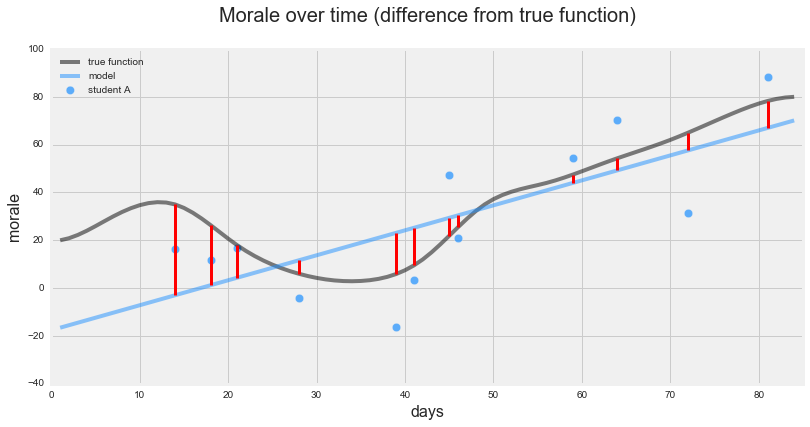

In [8]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax.plot(days, morale_true, lw=4, c='k', alpha=0.5, label='true function')

predictions = Amod.predict(days[:, np.newaxis])
ax.plot(days, predictions, lw=4, c='dodgerblue', alpha=0.5, label='model')

ax.scatter(students['A']['days'], students['A']['morale'],
           s=70, c='dodgerblue', label='student A', alpha=0.7)

for d in students['A']['days']:
    p = Amod.predict(d)
    ax.plot([d, d], [p, morale_func(d)], c='r', lw=3.)

ax.set_xlabel('days', fontsize=16)
ax.set_ylabel('morale', fontsize=16)
ax.set_title('Morale over time (difference from true function)\n', fontsize=20)
ax.set_xlim([0, 85])

plt.legend(loc='upper left')

### Variance of predictions

There is another source of error in the model: the variance of our predictions. 

Variance describes how much our predictions across different samples (students) at each time deviate from the mean prediction at that time point.

### $$\text{Var} = E\bigg[\big(F_{sample}(x) - E\big[F_{sample}(x)\big])^2\bigg]$$

Where $F_{sample}(x)$ is the estimate of the model for one of our samples $x$, and $E\big[F_{sample}(x)\big]$ is the expected value of our models' estimates across all of the $x_1$ to $x_n$ samples.

Alternatively we can write the variance as:

### $$ \text{Var}\big[\;\hat{f}(x)\;\big] = \text{E}[\;\hat{f}(x)^2\;] - \text{E}[\;\hat{f}(x)\;]^2 $$

### Measuring more students

To show variance, lets say we measure a second student, student "B":

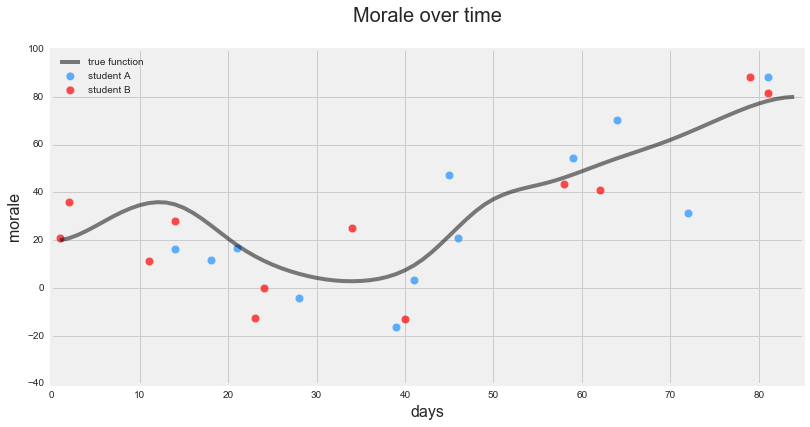

In [9]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax.plot(days, morale_true, lw=4, c='k', alpha=0.5, label='true function')

ax.scatter(students['A']['days'], students['A']['morale'],
           s=70, c='dodgerblue', label='student A', alpha=0.7)

ax.scatter(students['B']['days'], students['B']['morale'],
           s=70, c='r', label='student B', alpha=0.7)

ax.set_xlabel('days', fontsize=16)
ax.set_ylabel('morale', fontsize=16)
ax.set_title('Morale over time\n', fontsize=20)
ax.set_xlim([0, 85])

plt.legend(loc='upper left')

In [10]:
# Fit student b's model
studB_days = students['B']['days']
studB_mor = students['B']['morale']

Bmod = LinearRegression()
Bmod.fit(studB_days[:, np.newaxis], studB_mor)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

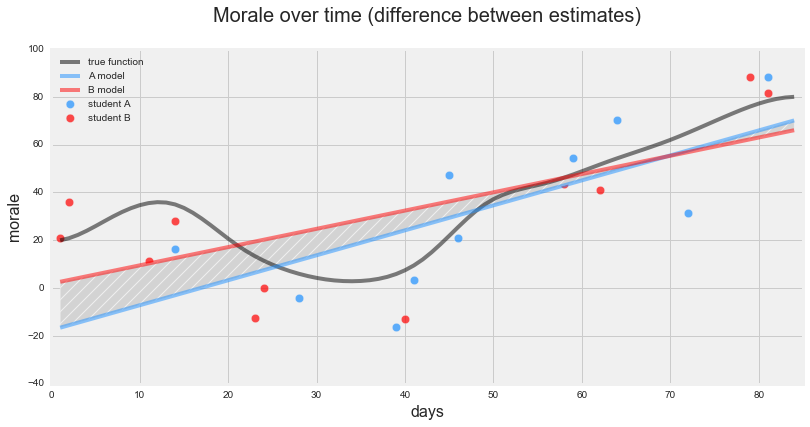

In [11]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax.plot(days, morale_true, lw=4, c='k', alpha=0.5, label='true function')

Apred = Amod.predict(days[:, np.newaxis])
ax.plot(days, Apred, lw=4, c='dodgerblue', alpha=0.5, label='A model')

Bpred = Bmod.predict(days[:, np.newaxis])
ax.plot(days, Bpred, lw=4, c='red', alpha=0.5, label='B model')

ax.scatter(students['A']['days'], students['A']['morale'],
           s=70, c='dodgerblue', label='student A', alpha=0.7)

ax.scatter(students['B']['days'], students['B']['morale'],
           s=70, c='red', label='student B', alpha=0.7)

ax.fill_between(days, Apred, Bpred, color='lightgrey', hatch='//', edgecolor=None)

ax.set_xlabel('days', fontsize=16)
ax.set_ylabel('morale', fontsize=16)
ax.set_title('Morale over time (difference between estimates)\n', fontsize=20)
ax.set_xlim([0, 85])

plt.legend(loc='upper left')

plt.show()

### Measuring more students

Below we will assess the morale of 3 different students over the days in the course at different times. We can build these simple `morale ~ time` models for each and plot.

Currently, these models are **high bias and low variance**. This is because there is a large amount of difference on average between the model predictions and the true function, but not a lot of variation in predictions at time points across our models for the 3 students.

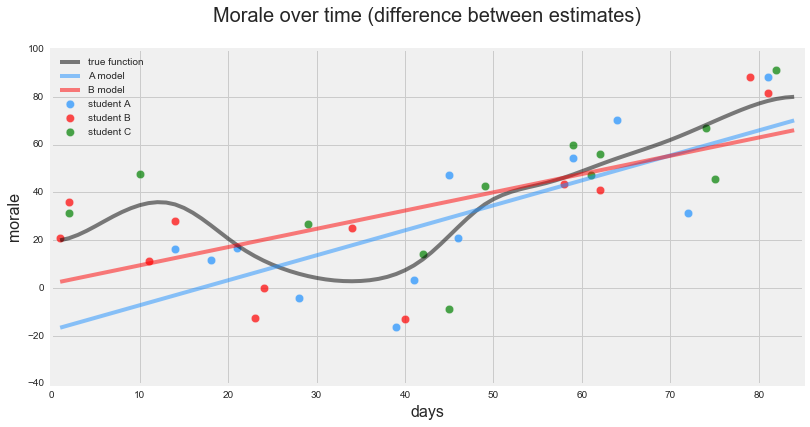

In [12]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax.plot(days, morale_true, lw=4, c='k', alpha=0.5, label='true function')

Apred = Amod.predict(days[:, np.newaxis])
ax.plot(days, Apred, lw=4, c='dodgerblue', alpha=0.5, label='A model')

Bpred = Bmod.predict(days[:, np.newaxis])
ax.plot(days, Bpred, lw=4, c='red', alpha=0.5, label='B model')

ax.scatter(students['A']['days'], students['A']['morale'],
           s=70, c='dodgerblue', label='student A', alpha=0.7)

ax.scatter(students['B']['days'], students['B']['morale'],
           s=70, c='red', label='student B', alpha=0.7)

ax.scatter(students['C']['days'], students['C']['morale'],
           s=70, c='green', label='student C', alpha=0.7)

ax.set_xlabel('days', fontsize=16)
ax.set_ylabel('morale', fontsize=16)
ax.set_title('Morale over time (difference between estimates)\n', fontsize=20)
ax.set_xlim([0, 85])

plt.legend(loc='upper left')

In [13]:
# Fit student C's model
studC_days = students['C']['days']
studC_mor = students['C']['morale']

Cmod = LinearRegression()
Cmod.fit(studC_days[:, np.newaxis], studC_mor)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

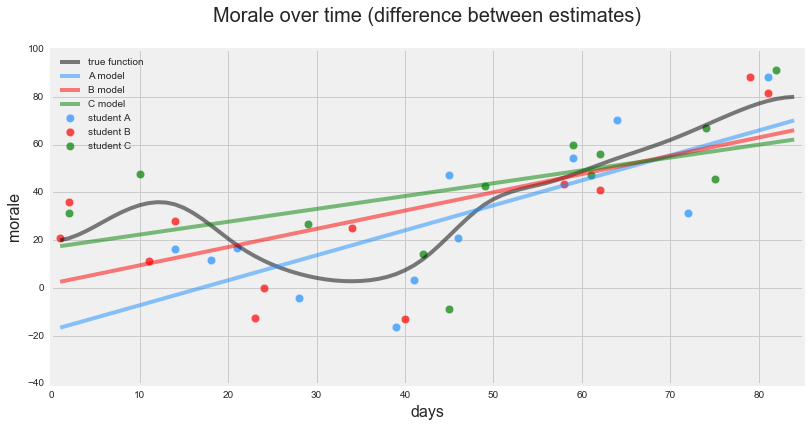

In [14]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax.plot(days, morale_true, lw=4, c='k', alpha=0.5, label='true function')

Apred = Amod.predict(days[:, np.newaxis])
ax.plot(days, Apred, lw=4, c='dodgerblue', alpha=0.5, label='A model')

Bpred = Bmod.predict(days[:, np.newaxis])
ax.plot(days, Bpred, lw=4, c='red', alpha=0.5, label='B model')


Cpred = Cmod.predict(days[:, np.newaxis])
ax.plot(days, Cpred, lw=4, c='green', alpha=0.5, label='C model')

ax.scatter(students['A']['days'], students['A']['morale'],
           s=70, c='dodgerblue', label='student A', alpha=0.7)

ax.scatter(students['B']['days'], students['B']['morale'],
           s=70, c='red', label='student B', alpha=0.7)

ax.scatter(students['C']['days'], students['C']['morale'],
           s=70, c='green', label='student C', alpha=0.7)


ax.set_xlabel('days', fontsize=16)
ax.set_ylabel('morale', fontsize=16)
ax.set_title('Morale over time (difference between estimates)\n', fontsize=20)
ax.set_xlim([0, 85])

plt.legend(loc='upper left')

### Increasing the complexity (and thus the variance) of our model

Currently we are just predicting that morale increases over time. In reality though, there is an increase, then a decrease, and then an increase again. 

Just using time alone can't fit a curve since there is only one coefficient being multiplied by time to make our morale prediction. We could, however, add more variables created from time such as $time^2$, $time^3$, etc.

The charts below show the difference in the fit when you add different numbers of "polynomial" time variables:

### $$\hat{morale} = \beta_0 + \beta_1time + \beta_2time^2$$
### $$\hat{morale} = \beta_0 + \beta_1time + \beta_2time^2 + \beta_3time^3 + \beta_4time^4$$
### $$\hat{morale} = \beta_0 + \beta_1time + ... + \beta_{16}time^{16}$$

In [15]:
def polynomial_modeler(X, y, degrees):
    polynomial_features = PolynomialFeatures(degree=degrees,
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    return pipeline

In [16]:
def plot_polyfit(X, y, truefunc, degrees=[1,2,4,16], 
                 student_color='darkred', name='A'):
    
    # set the plot size
    plt.subplots(figsize=(18,7))

    # create a plot for each polynomial degree plotted
    for i in range(len(degrees)):
        ax = plt.subplot(1, len(degrees), i + 1)
  
        poly_model = polynomial_modeler(X, y, degrees[i])

        X_test = np.linspace(1, 84, 200)
        plt.plot(X_test, poly_model.predict(X_test[:, np.newaxis]), lw=5.,
                 c=student_color, label="model", alpha=0.6)
        plt.plot(X_test, truefunc(X_test), lw=4, c='k', alpha=0.7, label='true function')
        plt.scatter(X, y, label="Student observations", c=student_color, s=40)
        plt.xlabel("days")
        plt.ylabel("morale")
        plt.xlim((0, 85))
        plt.ylim((-20, 100))
        plt.legend(loc="best")
        
        plt.title('Student '+name+" (degree {})".format(degrees[i]))

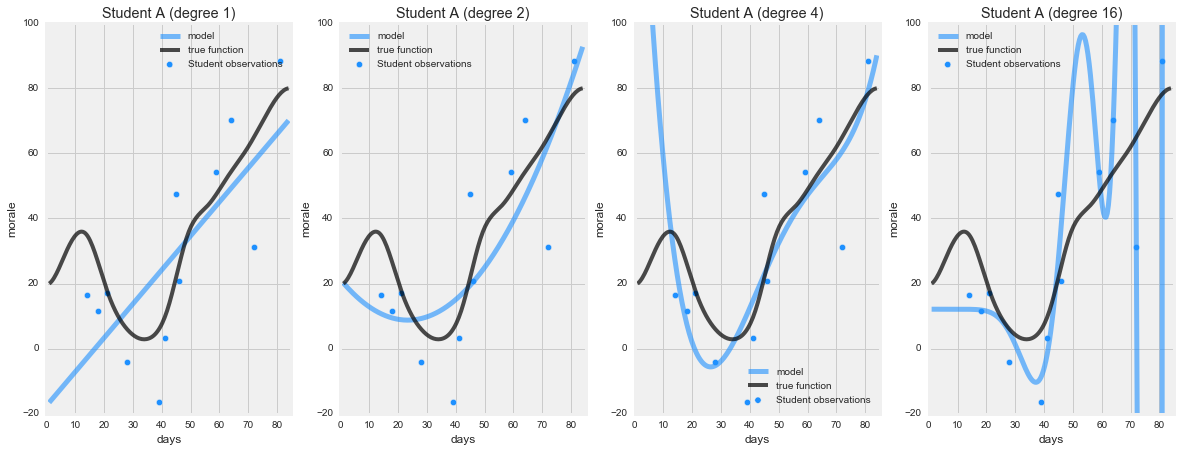

In [17]:
plot_polyfit(students['A']['days'], students['A']['morale'], morale_func,
             student_color='dodgerblue', name='A')

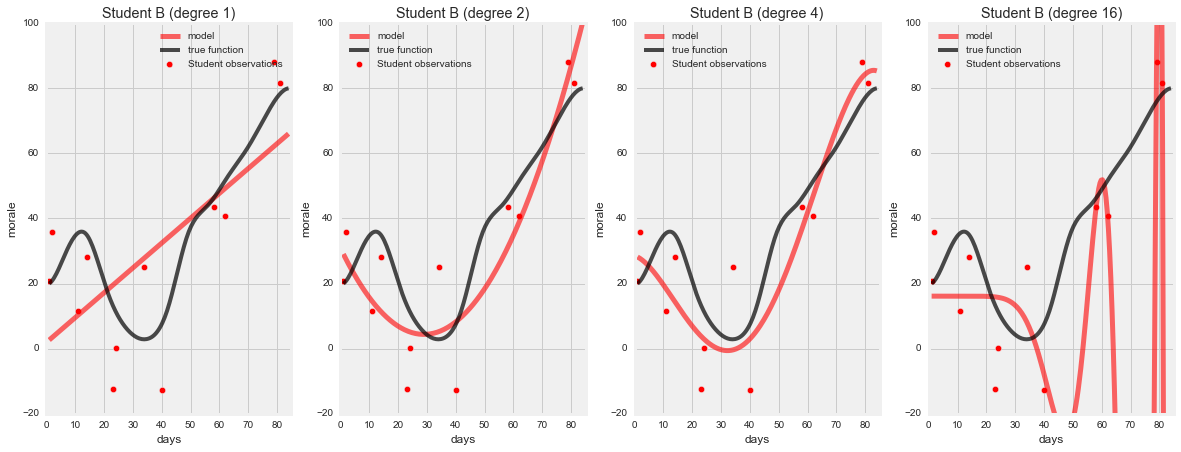

In [18]:
plot_polyfit(students['B']['days'], students['B']['morale'], morale_func,
             student_color='r', name='B')

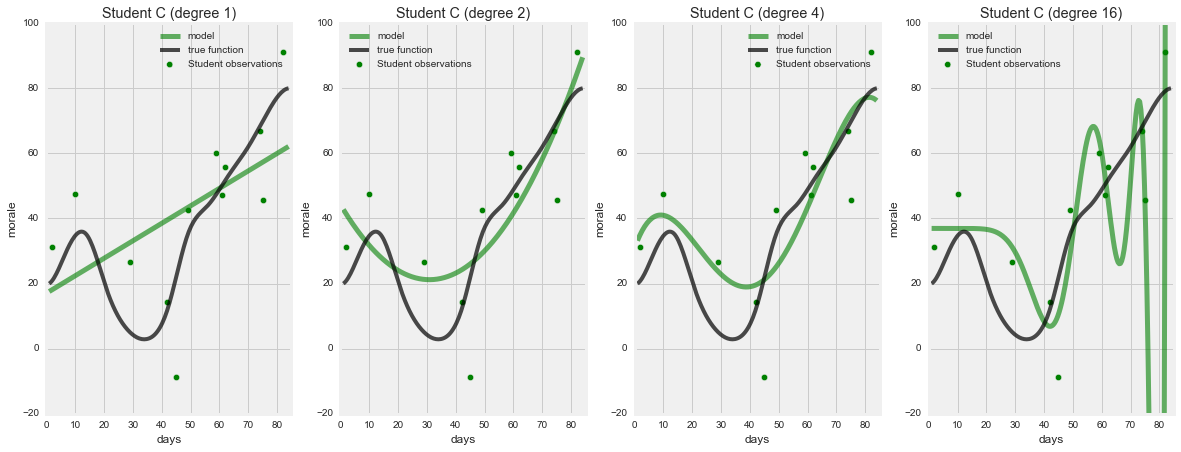

In [19]:
plot_polyfit(students['C']['days'], students['C']['morale'], morale_func,
             student_color='green', name='C')

### High variance typically comes with a high-complexity model

The variance between predictions typically goes up with increase in model complexity. Increasing the complexity of the model at the expense of good future predictions is known as "overfitting" the data.

Below are student A and student B fit with the 16-polynomial time model and the area showing the difference in predictions at time points between them. Compare this to the area we saw earlier with the single time term.

With an overfit model like this, variance between predictions for morale at a specific time is very high.

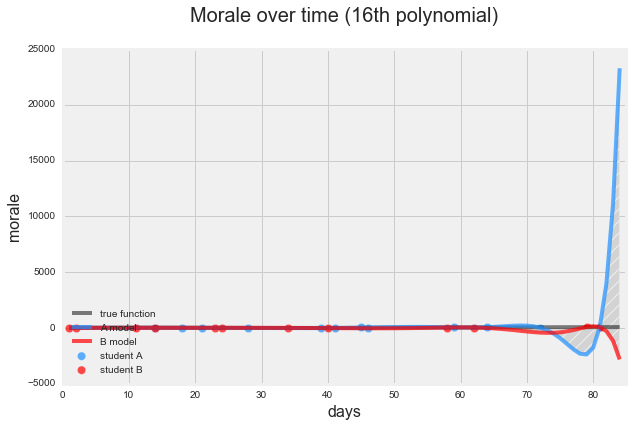

In [20]:
fig = plt.figure(figsize=(9,6))
ax = fig.gca()

ax.plot(days, morale_true, lw=4, c='k', alpha=0.5, label='true function')

Amod_complex = polynomial_modeler(students['A']['days'], students['A']['morale'], 16)
Bmod_complex = polynomial_modeler(students['B']['days'], students['B']['morale'], 16)


Apred = Amod_complex.predict(days[:, np.newaxis])
ax.plot(days, Apred, lw=4, c='dodgerblue', alpha=0.7, label='A model')

Bpred = Bmod_complex.predict(days[:, np.newaxis])
ax.plot(days, Bpred, lw=4, c='red', alpha=0.7, label='B model')

ax.scatter(students['A']['days'], students['A']['morale'],
           s=70, c='dodgerblue', label='student A', alpha=0.7)

ax.scatter(students['B']['days'], students['B']['morale'],
           s=70, c='red', label='student B', alpha=0.7)

ax.fill_between(days, Apred, Bpred, color='lightgrey', hatch='//', edgecolor=None)

ax.set_xlabel('days', fontsize=16)
ax.set_ylabel('morale', fontsize=16)
ax.set_title('Morale over time (16th polynomial)\n', fontsize=20)
ax.set_xlim([0, 85])

plt.legend(loc='lower left')

## Independent Practice

In the code snippet below, your job is to fill in the missing code where prompted. You are going to be fitting increasing degree polynomials to the data set using the loop below.  

- Notice how the SSE changes with increase degree polynomials (higher complexity models)
- What happens to the variance as this happens?
- Does increasing this polynomial degree improve your model? Always?
- Think about what would happend with a new sample drawn from this function. Would that high degree model, fare well?
- If you have extra time, work through the material in "additional resources?

Coefficients: -1.0450 
R-squared: 0.410
SSE: 11.007


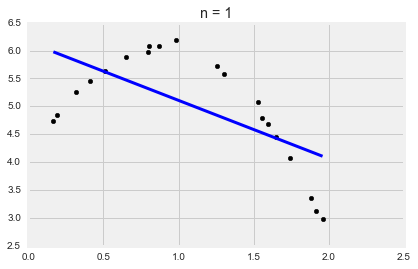

Coefficients: 4.3944 -2.3062 -0.1225 
R-squared: 0.997
SSE: 0.058


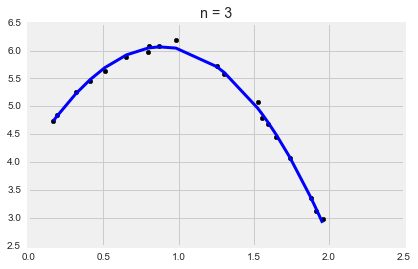

Coefficients: 4.3981 -3.4851 2.4791 -1.8692 0.4330 
R-squared: 0.998
SSE: 0.045


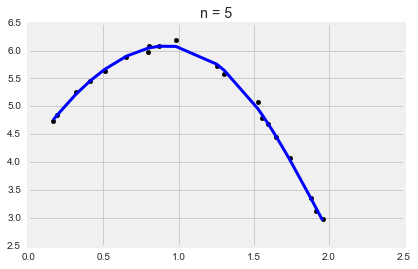

Coefficients: 19.6833 -68.2796 135.1836 -148.2823 89.4757 -28.1032 3.5950 
R-squared: 0.998
SSE: 0.036


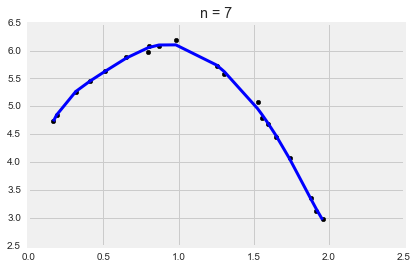

Coefficients: -8.7174 92.3580 -337.7499 664.3090 -767.9800 534.4253 -219.8927 49.1922 -4.6009 
R-squared: 0.998
SSE: 0.034


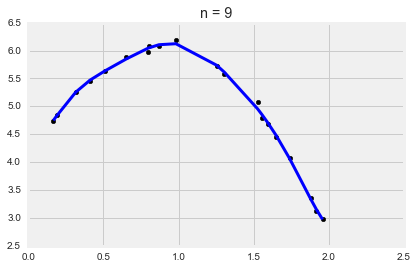

Coefficients: 163.4360 -1231.2724 5270.8112 -14007.7932 24317.3972 -28286.7395 22184.1999 -11567.9095 3842.1888 -735.4177 61.7348 
R-squared: 0.998
SSE: 0.031


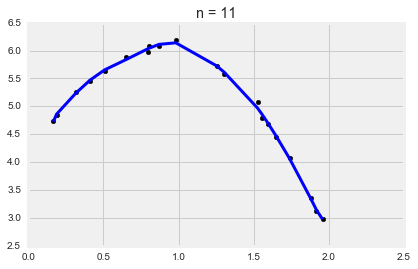

Coefficients: -351.0174 3483.5960 -18983.5661 64500.0150 -145493.1303 225638.8664 -244909.3952 186819.1398 -99188.0480 35661.0053 -8208.2673 1077.9026 -60.1722 
R-squared: 0.999
SSE: 0.021


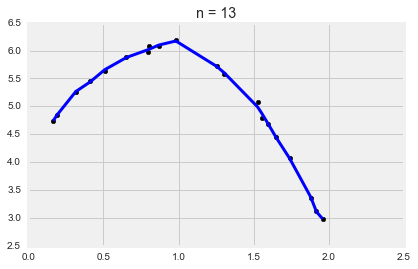

Coefficients: 584.1129 -5988.5702 34904.3680 -127147.0439 300980.7292 -459564.1497 408572.6624 -89475.6213 -273059.7158 408837.7467 -304249.8267 139320.3609 -39722.1208 6501.6427 -468.3845 
R-squared: 0.999
SSE: 0.017


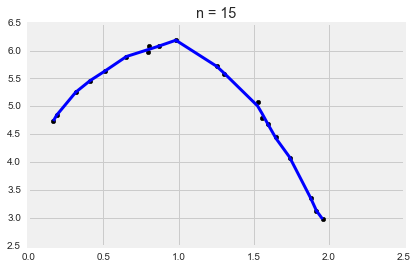

In [33]:
# ------- helper functions --------------------
def polynomials(X, degree=1):
    array = [X]
    y = X
    for i in range(2, int(degree + 1)):
        y = y * X
        array.append(y)
    return np.array(array).transpose()

def generate_data(func, a, b, n=100):
    data = []
    for _ in range(n):
        x = random.random() * (b - a)
        y = func(x)
        data.append((x, y))
    return list(sorted(data))

mu, sigma = 0, 0.1
f = lambda x: 4 + 5 * x - 3 * x*x + 0.1 * x * x * x + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2, n=20)

domain = np.array([x[0] for x in data])
y = np.array([x[1] for x in data])

# ---------------------------------------------

for i in range(1, 16, 2):
    X = polynomials(domain, i)
    
    # Instantiate linear regression object and fit it
    regr = LinearRegression()
    regr.fit(X, y)
    
    # Get the predicted y values from the model
    yhat = regr.predict(X)
    
    # Calculate the sum of squared errors
    sse = sum((y - yhat) ** 2)
    
    # The coefficients
    print 'Coefficients:',
    for b in ['%.4f' % b for b in regr.coef_]: print b,
    # Explained variance score: 1 is perfect prediction
    print('\nR-squared: %.3f' % regr.score(X, y))

    # The mean square error
    print("SSE: %.3f" % sse)
        
    # Plot outputs
    plt.scatter(domain, y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))
    plt.show()

## Conclusion

In this lecture, we seen:
- That total error can be decomposed into error due to bias and error due to variance (as well as irreducible error)
- That in practice, there exists a tradeoff between these two
- That as "model complexity" increases, variance tends to increase while bias falls
- High variance models are closely associated with the concept of "overfiting"
- There exists a "sweet spot" where a model best generalizes 

## Additional Resources

[Bias-Variance Decomposition](https://theclevermachine.wordpress.com/tag/bias-variance-decomposition/)<br>
[Understanding the Tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html)